Credit: 

   * Most material based on [Sam Roweis](https://www.cs.nyu.edu/home/people/in_memoriam/samroweis.html)' Linear Algebra Review


In [1]:
%matplotlib notebook

# Note that this is the usual way that I import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Vectors and Matrices
 
Linear algebra is the study of vectors and matrices and how they can be manipulated to perform various calculations. 

Consider functions which take several input arguments and produce several output arguments. If we stack up the input arguments into a vector $\mathbf{x}$ and the outputs into a vector $\mathbf{y}$, then a function $\mathbf{y} = f(\mathbf{x})$ is said to be *linear* if:

$$f\left(\alpha \mathbf{x} + \beta \mathbf{u} \right) = \alpha f\left( \mathbf{x} \right) + \beta f \left( \mathbf{u} \right)$$

for all scalars, $\alpha, \beta$ and all vectors $\mathbf{x}, \mathbf{u}$. In other words, *scaling the input scales the output* and *summing inputs sums their outputs*.

**Now for an amazing fact**:

All functions which are linear can be written in the form of a matrix $F$ which left multiplies the input argument $\mathbf{x}$:

$$\mathbf{y} = F \mathbf{x}$$

Furthermore, all matrix relations like the one above represent linear functions from their inputs to their outputs.

**Another interesting fact** is that the composition of two linear functions is still linear:

$$g\left(f\left(\mathbf{x}\right)\right) = GF\mathbf{x} = H \mathbf{x} = h(\mathbf{x})$$

*The entire study of multiple-input multiple-output linear functions can be reduced to the study of vectors and matrices.*

# Multiplication, Addition, Transposition

Adding up two vectors or two matrices is easy: just add their corresponding elements (of course the two must be the same shape!):

In [3]:
a = np.array([1, 2, 3])
b = np.ones(3,)
print(a)
print(b)
print(a + b)

[1 2 3]
[1. 1. 1.]
[2. 3. 4.]


In [4]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.arange(6).reshape(A.shape)
print(A)
print(B)
print(A + B)

[[1 2 3]
 [4 5 6]]
[[0 1 2]
 [3 4 5]]
[[ 1  3  5]
 [ 7  9 11]]


Multiplying a vector or matrix by a scalar just multiplies each element by the scalar:

In [5]:
print(2 * a)
print(0.5 * A)

[2 4 6]
[[0.5 1.  1.5]
 [2.  2.5 3. ]]


## Matrix-vector and matrix-matrix multiplication

A good way to think of an $n \times m$ matrix $F$ is as a machine that eats $m$ sized vectors and spits out $n$ sized vectors. This conversion process is known as (left) multiplying by $F$ and has many similarities to scalar multiplication, but also a few differences. Most importantly, the machine only accepts inputs of the right size.

In [6]:
# In Numpy, both matrix-vector and matrix-matrix multiplication is performed by np.dot
print(A.shape)
print(a.shape)
print(np.dot(A, a))
print(A.dot(a))

(2, 3)
(3,)
[14 32]
[14 32]


In [7]:
print(np.dot(A, a[:2]))  # not compatible sizes

ValueError: shapes (2,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

Like scalar multiplication, matrix multiplication is *distributive* and *associative*:

$$
\begin{aligned}
F(\mathbf{a} + \mathbf{b}) & = F\mathbf{a} + F\mathbf{b}\\
 G(F\mathbf{a}) & = (GF)\mathbf{a}
\end{aligned}
$$

One way to think of this is that the matrix product $GF$ is the equivalent linear operator you get if you compose the action of $F$ followed by the action of $G$.

Matrix-matrix multiplication can be thought of as a sequence of matrix-vector multiplications, one for each column, whose results get stacked beside each other in columns to form a new matrix. In general, we can think of column vectors of length $k$ as just $k \times 1$ and row vectors as $1 \times k$ matrices. This eliminates any distinction between matrix-matrix and matrix-vector multiplication.

In [8]:
print(np.dot(A, A.T))

[[14 32]
 [32 77]]


Note that in the above, we flipped or "transposed" the matrix. This interchanges the rows and columns, and in the example above, made the shapes compatible for matrix-matrix multiplication.

In [9]:
print(A.shape)
print(A.T.shape)

(2, 3)
(3, 2)


Unlike scalar multiplication, matrix multiplication is not *commutative*:

$$ F \mathbf{a} \neq \mathbf{a} F $$

Multiplying a vector by itself (transposed) gives a scalar $\mathbf{x}^T \mathbf{x}$ which is known as the (squared) *norm* or squared length of the vector and is written $||\mathbf{x}||^2$. This measure adds up the sum of the squares of the elements of the vector. For much more about norms, see [Goodfellow et al. Chapter 2](http://www.deeplearningbook.org/contents/linear_algebra.html).

In [10]:
print(np.dot(a.T, a))
print(np.dot(a, a))  # note we didn't actually need the transpose - numpy automatically does dot product with two vector inputs
print(np.linalg.norm(a)**2)  # this is a more powerful function for computing general norms

14
14
14.0


For more information about efficiently computing norms (and also how to call [BLAS](https://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms) directly from Python) see [this blog post](http://fseoane.net/blog/2011/computing-the-vector-norm/).

The *Frobenius norm* of a matrix $||A||^2$ similarly adds up the squares of all the matrix elements.

In [11]:
print(np.sum(A * A))  # note * is element-wise multiplication, not matrix-matrix multiplication
print(np.linalg.norm(A)**2)  # by default, linalg.norm() computes Frobenius norm for matrix input

91
91.0


# Inverses and Determinants

First, let's consider the concept of reversing or undoing or *inverting* the function represented by a matrix $A$. For a function to be invertible, there needs to be a one-to-one relationship between inputs and outputs so that given the output you can always say exactly what the input was. In other words, we need a function which, when composed with $A$ gives back the original vector. Such a function -- if it exists -- is called the *inverse* of $A$ and the matrix is denoted $A^{-1}$.

In matrix terms, we seek a matrix that left multiplies $A$ to give the identity matrix:

$$A^{-1}A = I$$

The identity matrix, $I_{ij} = \delta_{ij}$ corresponds to the identity (do-nothing) function.

Only a few, special linear functions are invertible. 

* They must have at least as many outputs as inputs
* They must not map any two inputs to the same output

Technically this means that they must have *full rank*, a concept which we will get to later.

Non-square matrices ($m$-by-$n$ matrices for which $m \neq n$) technically do not have an inverse. However, in some cases such a matrix may have a *left inverse* or *right inverse* (but not both). If A is $m$-by-$n$ and the rank of $A$ is equal to $n$, then $A$ has a left inverse: an $n$-by-$m$ matrix $B$ such that $BA = I$. If $A$ has rank $m$, then it has a right inverse: an $n$-by-$m$ matrix $B$ such that $AB = I$. [Goodfellow et al. Chapter 2](http://www.deeplearningbook.org/contents/linear_algebra.html) provides a lot more detail on inverses.

In [12]:
C = A.dot(A.T)  # A trick to make an invertible matrix
C_inv = np.linalg.inv(C)
print(C)
print(C_inv) 
print(C_inv.dot(C))

[[14 32]
 [32 77]]
[[ 1.42592593 -0.59259259]
 [-0.59259259  0.25925926]]
[[ 1.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  1.0000000e+00]]


The matrix *determinant* is a scalar quantity, normally denoted $|A|$ or $\text{det}(A)$ whose absolute value measures how much the matrix "stretches" or "squishes" volume as it transforms its inputs to outputs and whose sign indicates whether the transformation is [orientation preserving](http://en.wikipedia.org/wiki/Orientation_%28vector_space%29). Matrices with large determinants do (on average) a lot of stretching and those with small determinants do a lot of squishing.

Matrices with zero determinant have rank less than the number of rows and and actually collapse some of their input space into a line or hyperplane (pancake) in the output space, and this can be thought of doing "infinite squishing". Conventionally, the determinant is only defined for square matrices, but there is a natural extension to rectangular ones using the *singular value decomposition*.

In [13]:
A = np.array([[2, 3, 0], [3, 2, 7], [2, 1, 6]])
print(A)
print(np.linalg.det(A))
print(np.linalg.det(np.linalg.inv(A)))  # note 1/det(A)
B = np.array([[2, 3, 2], [1, 2, 4], [3, 5, 6]])
print(np.linalg.matrix_rank(B))
print(B)
print(np.linalg.det(B))  # not quite zero because of numerical instability

[[2 3 0]
 [3 2 7]
 [2 1 6]]
-2.000000000000006
-0.49999999999999917
2
[[2 3 2]
 [1 2 4]
 [3 5 6]]
2.664535259100367e-15


# Fundamental Matrix Equations

The two most important matrix equations are the system of linear equations:

$$A \mathbf{x} = \mathbf{b}$$ 

and the eigenvector equation:

$$A \mathbf{x} = \lambda \mathbf{x}$$

which between them cover a large number of optimization and constraint satisfaction problems. As we've written them above, $\mathbf{x}$ is a vector but these equations also have natural extensions to the case where there are many vectors simultaneously satisfying the equation $AX = B$ or $AX = \lambda X$.

# Systems of Linear Equations

A central problem in linear algebra is the solution of a system of linear equations like this:

$$
\begin{align}
3x + 4y + 2z &= 12\\
x + y + z &=5
\end{align}
$$

Typically, we express this system as a single *matrix equation* in the form: $A\mathbf{x} = \mathbf{b}$, where $A$ is an $m$-by-$n$ matrix, $\mathbf{x}$ is an $n$-dimensional column vector, and $\mathbf{b}$ is an $m$-dimensional column vector. The number of unknowns is $n$ and the number of equations or constraints is $m$. Here is another simple example:

$$
\left[ 
\begin{array}{rr}
2 & -1\\
1 & 1
\end{array}
\right] 
\left[
\begin{array}{c}
x_1 \\
x_2
\end{array}
\right]
=
\left[
\begin{array}{c}
1\\
5
\end{array}
\right]
$$

How do we go about "solving" this system of equations? 

* Finding $\mathbf{b}$ given $A$ and $\mathbf{x}$ is easy - just multiply
* For a single $\mathbf{x}$ and $\mathbf{b}$ there are usually a great many matrices $A$ which satisfy the equation
* The only interesting problem left is to find $\mathbf{x}$ given $A$ and $\mathbf{b}$!

This kind of equation is really a problem statement. It says "we applied the function $A$ and generated the output $\mathbf{b}$; what was the input $\mathbf{x}$?"

The matrix $A$ is dictated to us by our problem, and represents our model of how the system we are studying converts inputs to outputs. The vector $\mathbf{b}$ is the output that we observe (or desire) - we know it. The vector $\mathbf{x}$ is the set of inputs that we are trying to find.

There are two ways of thinking about this system of equations. One is *rowwise* as a set of $m$ equations, or constraints that correspond geometrically to $m$ intersecting constraint surfaces:

$$
\left[
\begin{array}{r}
2x_1 - x_2 &= 1\\
x_1 + x_2 &= 5
\end{array}
\right]
$$

The goal is to find the point(s), for example $(x_1, x_2)$ above, which are at the intersection of all the constraint surfaces. In the example above, these surfaces are two lines in a plane. If the lines intersect then there is a solution. If they are parallel, there is not. If they are coincident then there are infinite solutions. In higher dimensions there are more geometric solutions, but in general there can be no solutions, one solution, or infinite solutions.

The other way of thinking about this system is *columnwise* in which we think of the entire system as a single vector relation:

$$
x_1
\left[
\begin{array}{r}
2\\
1
\end{array}
\right]
+
x_2
\left[
\begin{array}{r}
-1\\
1
\end{array}
\right]
=
\left[
\begin{array}{r}
1\\
5
\end{array}
\right]
$$

The goal here is to discover which linear combination(s) $(x_1, x_2)$, if any, of the $n$ column vectors on the left will give the one on the right.

Either way, the matrix equation $A\mathbf{x} = \mathbf{b}$ is an almost ubiquitous problem whose solution comes up again and again in theoretical derivations and in practical data analysis problems. One of the most important applications is the minimization of quadratic energy functions: if $A$ is symmetric positive definite then the quadratic form $\mathbf{x}^TA\mathbf{x} - 2 \mathbf{x}^T\mathbf{b} + c$ is *minimized* at the point where $A\mathbf{x}=\mathbf{b}$. Such quadratic forms arise often in the study of linear models with Gaussian noise since the log likelihood of data under such models is always a matrix quadratic.

## Least squares: solving for $\mathbf{x}$

Let's first consider the case of a single $\mathbf{x}$. As noted above, geometrically we can think of the rows of the system as encoding constraint surfaces in which the solution vector $\mathbf{x}$ must lie and what we are looking for is the point(s) at which these surfaces intersect. Of course, there may be no solution satisfying the equation; then we typically need some way to pick the "best" approximate solution. The constraints may also intersect along an entire line or surface in which case there are an infinity of solutions; once again we would like to think about which one might be best.

Let's consider finding exact solutions first. The most naive thing we could do is just find the inverse of $A$ and solve the equations as follows:

$$
\begin{align}
A^{-1}A\mathbf{x} & = A^{-1} \mathbf{b}\\
I\mathbf{x} &= A^{-1}\mathbf{b}\\
\mathbf{x} &= A^{-1}\mathbf{b}
\end{align}
$$

which is known as *Cramer's rule*.

There are several problems with this approach. Most importantly, many interesting functions are not invertible. Beyond that, matrix inversion is a difficult and potentially numerically unstable operation. **Don't invert a matrix unless you really have to!**

In fact, there is a much better way to define what we want as a solution. We will say that we want a solution $\mathbf{x}^*$ which minimizes the error:

$$E = ||A\mathbf{x}^* - \mathbf{b}||^2 = \mathbf{x}^TA^TA\mathbf{x} - 2\mathbf{x}^TA^T\mathbf{b} + \mathbf{b}^T\mathbf{b}$$

This problem is known as *linear least squares*, for obvious reasons. If there is an exact solution (one giving zero error) it will certainly minimize the above cost, but if there is no solution, we can still find the best possible approximation. If we take the matrix derivative of this expression, we can find the best solution:

$$\mathbf{x}^* = (A^TA)^{-1}A^T\mathbf{b}$$

which takes advantage of the fact that even if $A$ is not invertible, $A^TA$ may be.

But what if the problem is degenerate? In other words, what if there is more than one exact solution or more than one inexact solution which all achieve the same minimum error. How can this occur? 

Imagine an equation like this:

$$\left[
\begin{array}{rr}
1 &  -1
\end{array}
\right] \mathbf{x} = 4$$

in which $A = \left[ \begin{array}{rr}
1 &  -1 
\end{array} \right]$. This equation constrains the difference between the two elements of $\mathbf{x}$ to be 4 but the sum of the two elements can be as large or small as we want. 

We can take things one step further to get around this problem. The answer is to ask for the *minimum norm* vector $\mathbf{x}$ that still minimizes the above error. This breaks the degeneracies in both the exact and inexact cases. In terms of the cost function, this corresponds to adding an infinitesimal penalty on $\mathbf{x}^T\mathbf{x}$:

$$
E = \text{lim}_{\epsilon \rightarrow 0} \left[ \mathbf{x}^TA^TA\mathbf{x} - 2\mathbf{x}^TA^T\mathbf{b} + \mathbf{b}^T\mathbf{b} + \epsilon \mathbf{x}^T\mathbf{x} \right]
$$

and the optimal solution becomes

$$
\mathbf{x}^* = \lim_{\epsilon \rightarrow 0}  \left[ \left(A^TA + \epsilon I\right)^{-1}A^T\mathbf{b}\right]
$$

Now, of course actually computing these solutions efficiently and in a numerically stable way is the topic of much study in numerical methods. However, in Python you don't have to worry about any of this, you can just type ``np.linalg.solve(A, b)`` (if $A$ is square) or ``np.linalg.lstsq(A, b)`` (if $A$ is not square) and let someone else worry about it.

In [14]:
A = np.array([[1,2],[3,4]])
print(A)
b = np.array([[5],[6]])
print(b)
x = np.linalg.inv(A).dot(b) #Cramer's rule, slow
print(x)
print(A.dot(np.linalg.inv(A).dot(b))-b) #check
x1 = np.linalg.solve(A,b) #fast; computes the "exact" solution
print(x1)
print(A.dot(x1)-b) #check

[[1 2]
 [3 4]]
[[5]
 [6]]
[[-4. ]
 [ 4.5]]
[[0.]
 [0.]]
[[-4. ]
 [ 4.5]]
[[0.]
 [0.]]


In [17]:
A = np.array([[1, 2, 3],[4, 5, 6]])
print(A)
b = np.array([[5],[6]])
print(b)
# computes the least-squares solution to a linear matrix equation
# equation may be under-, well, or over- determined
x, residuals, rank, s =  np.linalg.lstsq(A, b, rcond=None)
print(x)
print(A.dot(x))

[[1 2 3]
 [4 5 6]]
[[5]
 [6]]
[[-2.05555556]
 [ 0.11111111]
 [ 2.27777778]]
[[5.]
 [6.]]


## Linear regression: solving for $A$

Now consider what happens if we have many vectors $\mathbf{x}_i$ and $\mathbf{b}_i$, all of which we want to satisfy the equation $A \mathbf{x}_i = \mathbf{b}_i$. If we stack the vectors $\mathbf{x}_i$ beside each other as the columns of a large matrix $X$ and do the same for $\mathbf{b}_i$ to form $B$, we can write the problem as a large matrix equation:

$$AX = B$$

There are two things we could do here. If, as before, $A$ is known, we could find $X$ given $B$. To do this, we would just need to apply the techniques described above to solve the system $A \mathbf{x}_i = \mathbf{b}_i$ independently for each column $i$.

However, if we were given *both* $X$ and $B$ we could try to find a *single* $A$ which satisfies the equations. In essense, we are fitting a linear function given its inputs $X$ and corresponding outputs $B$. This problem is called *linear regression*. Usually we add a row of ones to $X$ to fit an affine function (i.e. one with an offset).

Again, there are only very few cases in which there exists an $A$ which exactly satisfies the equations (if there is, $X$ will be square and invertible). However, we can set things up the same way as before and ask for the *least-squares* $A$ which minimizes:

$$E = \sum_i ||A \mathbf{x}_i - \mathbf{b}_i||^2$$

Using matrix calculus, we can derive the optimal solution to this problem. The answer, one of the most famous formulas in all of mathematics, is known as the *discrete Wiener filter*:

$$ A^* = BX^T\left(XX^T\right)^{-1}$$

Once again, we might have invertibility problems in $XX^T$, this corresponds to having fewer equations than unknowns in our linear system (or duplicated equations), thus leaving some of the elements in $A$ unconstrained. We can get around this in the same way as with linear least squares by adding a small amount of penalty on the norm of the elements of $A$.

$$E = \sum_i ||A \mathbf{x}_i - \mathbf{b}_i||^2 + \epsilon ||A||^2$$

which means we are asking for the matrix of minimum norm which still minimizes the sum squared error on the outputs. Under this cost, the optimal solution is:

$$ A^* = BX^T\left(XX^T + \epsilon I\right)^{-1}$$

which is known as *ridge regression*. Often it is a good idea to use a small nonzero value of $\epsilon$ even if $XX^T$ is technically invertible, because this gives more stable solutions by penalizing large elements of $A$ that aren't doing much to reduce the error. In neural networks, this is known as *weight decay*, and in general, is known as *regularization*. You can also interpret it as having a Gaussian prior with mean zero and variance $1/2\epsilon$ on each element of $A$.

In Python, you should not actually invert the matrix, just type ``np.linalg.lstsq(X, b)``.

<IPython.core.display.Javascript object>


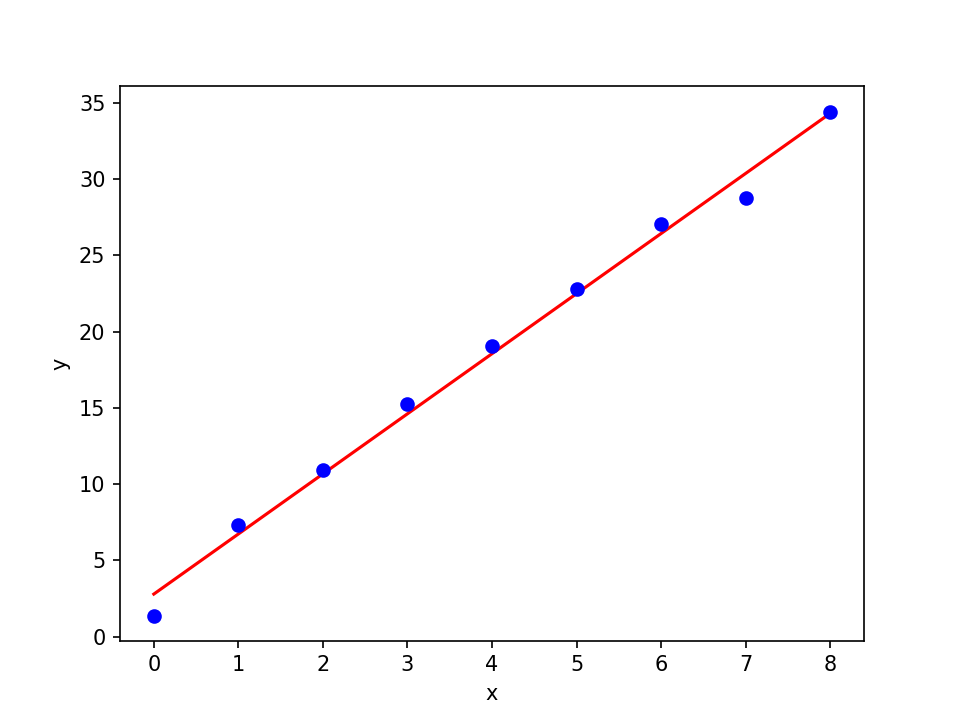

Text(0,0.5,'y')

In [19]:
N = 9  # how many data points
x1 = np.arange(0, N)
# note, here the data is stacked in columns
# this is not Python convention (convention is to stack data in rows)
# but it's the convention in this tutorial!
X = np.array([x1, np.ones(N)])
y = 4 * x1 + 3 + np.random.randn(N)  # note x1 is only 1-d here, but it is m-d in general
A, residuals, rank, s = np.linalg.lstsq(X.T, y, rcond=None)
line = A[0] * x1 + A[1] # regression line
plt.plot(x1, line, 'r-', x1, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')